In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
os.chdir('/workspace')
from src import datasets, sca_utils

In [2]:
ds = datasets.ASCADf.Dataset('/mnt/d/Datasets', scale=False, profiling=True)

In [3]:
target_byte = 2
sim = datasets.ASCAD_sim.Dataset(
    ds.plaintext,
    ds.key,
    ds.masks,
    target_byte=target_byte,
    label_transforms=[],
    trace_transforms=[])

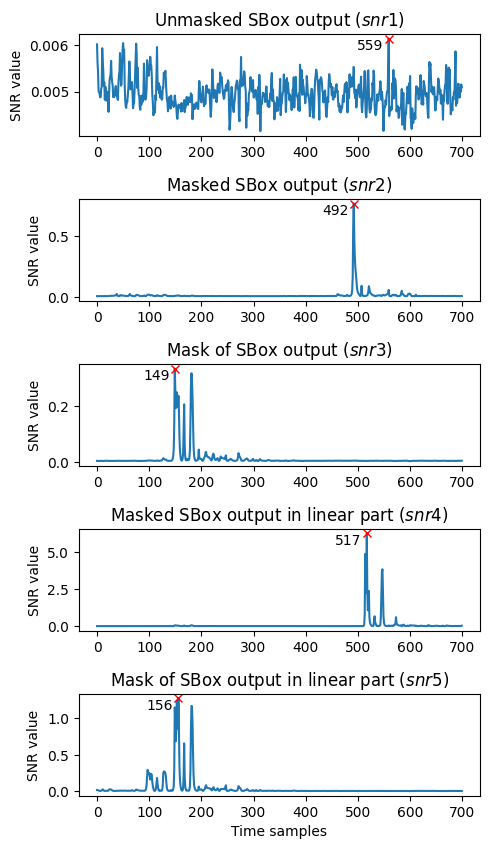

In [4]:
keys = ['Unmasked SBox output ($snr1$)',
        'Masked SBox output ($snr2$)',
        'Mask of SBox output ($snr3$)',
        'Masked SBox output in linear part ($snr4$)',
        'Mask of SBox output in linear part ($snr5$)']
fig = plt.figure(figsize=(5, 10))
x = np.array([ds[v][0] for v in range(len(ds))], dtype=np.float32)

snrs = {}
for i, k in enumerate(keys):
    t = np.array([sim.calc_ivs(v)[i] for v in range(len(ds))], dtype=np.float32)
    snr = sca_utils.snr_fast(x, t)
    snrs[k] = snr
    ax = fig.add_subplot(len(keys)+1, 1, i+2)
    ax.plot(snr)
    ax.plot(snr.argmax(), snr.max(), 'rx')
    ax.text(snr.argmax()-10, snr.max(), str(snr.argmax()), ha='right', va='top')
    ax.set_title(f'{k}')
    ax.set_ylabel('SNR value')
ax.set_xlabel('Time samples')
plt.tight_layout()
plt.show()

save_path = Path('/', 'workspace', 'results', 'ascad')
Path(save_path).mkdir(exist_ok=True, parents=True)
fig.savefig(Path(save_path, 'ASCADf.png'), dpi=300, bbox_inches=0)
np.savez(Path(save_path, 'ASCADf_SNR.npz'), **snrs)